In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
path = 'Data'

In [ ]:
Image = []
for filename in os.listdir(path):
    # Check if the file is an image
    if filename.lower().endswith('.jpg'):
        # Construct full file path
        file_path = os.path.join(path, filename)
        # Read the image using OpenCV
        image = cv2.imread(file_path)
        # Check if the image was read correctly
        if image is not None:
            Image.append(image)
        else:
            print(f"Warning: Unable to read {file_path}")

In [ ]:
print(f"Images Loaded: {len(Image)}")

In [ ]:
for i, image in enumerate(Image):
    # Convert the image to grayscale
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply thresholding or edge detection (e.g., Canny edge detection)
    # Option 1: Using binary thresholding
    ret, thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
    
    # Find contours
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on the original image
    img_contour = cv2.drawContours(image.copy(), contours, -1, (0, 255, 0), 3)
   
    # Visualize the contoured image
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title(f"Contoured Image {i+1}")
    plt.imshow(cv2.cvtColor(img_contour, cv2.COLOR_BGR2RGB))

# Show the plots
plt.show()


In [ ]:
for i, image in enumerate(Image):
    # Convert the image to grayscale
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply thresholding (e.g., binary thresholding)
    ret, thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
    
    # Find contours and hierarchy
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # Draw contours up to level 2
    img_contour = image.copy()
    for j, contour in enumerate(contours):
        # Check if the contour is within level 2
        if hierarchy[0][j][3] == -1 or hierarchy[0][j][3] == 0:  
            cv2.drawContours(img_contour, [contour], -1, (0, 0, 255), 3)
        elif hierarchy[0][j][3] == 1:  # Child contour (level 1)
            cv2.drawContours(img_contour, [contour], -1, (0, 0, 255), 3)
        elif hierarchy[0][j][3] == 2:  # Grandchild contour (level 2)
            cv2.drawContours(img_contour, [contour], -1, (0, 0, 255), 3)

    # Visualize the contoured image with hierarchy
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title(f"Contoured Image {i+1} (Up to Level 2)")
    plt.imshow(cv2.cvtColor(img_contour, cv2.COLOR_BGR2RGB))

plt.show()

In [ ]:
for i, image in enumerate(Image):
    # Convert the image to grayscale
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply thresholding (e.g., binary thresholding)
    ret, thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
    
    # Find contours and hierarchy
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # Initialize a variable to track the maximum level of hierarchy
    max_level = 0
    
    # Iterate over the hierarchy to determine the maximum level
    for j in range(len(hierarchy[0])):
        level = 0
        parent = hierarchy[0][j][3]
        
        # Traverse up the hierarchy to find how deep this contour is
        while parent != -1:
            level += 1
            parent = hierarchy[0][parent][3]
        
        # Track the maximum level encountered
        max_level = max(max_level, level)
    
    # Print the maximum level of the hierarchy for the current image
    print(f"Image {i+1} - Maximum Contour Hierarchy Level: {max_level}")

    # Visualize the contoured image (optional)
    img_contour = image.copy()
    for j, contour in enumerate(contours):
        cv2.drawContours(img_contour, [contour], -1, (0, 255, 0), 3)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title(f"Contoured Image {i+1}")
    plt.imshow(cv2.cvtColor(img_contour, cv2.COLOR_BGR2RGB))

# Show the plots
plt.show()


In [ ]:
Level_Limit = 3

for i, image in enumerate(Image):
    # Convert the image to grayscale
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply thresholding (e.g., binary thresholding)
    ret, thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
    
    # Find contours and hierarchy
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # Initialize a variable to track the maximum level of hierarchy
    max_level = 0
    
    # Iterate over the hierarchy to determine the maximum level
    for j in range(len(hierarchy[0])):
        level = 0
        parent = hierarchy[0][j][3]
        
        # Traverse up the hierarchy to find how deep this contour is
        while parent != -1:
            level += 1
            parent = hierarchy[0][parent][3]
        
        # Track the maximum level encountered
        max_level = max(max_level, level)
    
    # Define the maximum depth to print contours (1 less than max level)
    depth_to_print = max_level - Level_Limit
    
    
    # Draw contours up to the level 'depth_to_print'
    img_contour = image.copy()
    for j in range(len(contours)):
        level = 0
        parent = hierarchy[0][j][3]
        
        # Traverse up the hierarchy to calculate the depth of the contour
        while parent != -1:
            level += 1
            parent = hierarchy[0][parent][3]
        
        # Draw the contour only if it's within the allowed depth
        if level <= depth_to_print:
            cv2.drawContours(img_contour, [contours[j]], -1, (0, 0, 255), 2)

    # Visualize the contoured image with hierarchy up to 'depth_to_print'
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title(f"Contoured Image {i+1} (Up to Level {depth_to_print})")
    plt.imshow(cv2.cvtColor(img_contour, cv2.COLOR_BGR2RGB))

# Show the plots
plt.show()


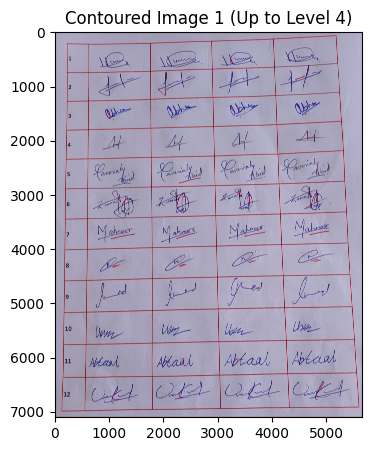

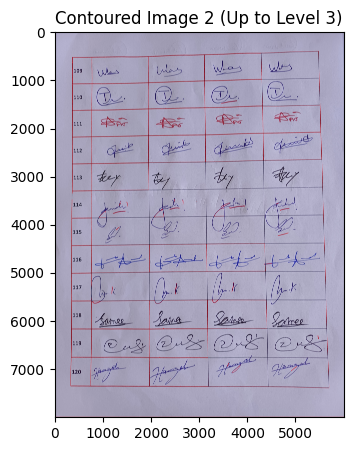

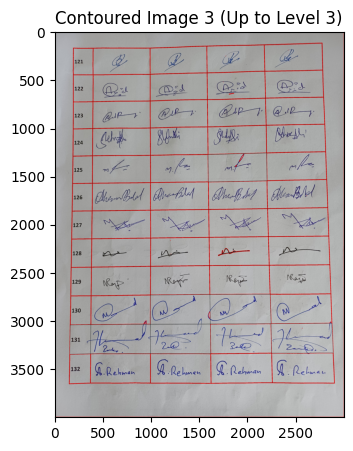

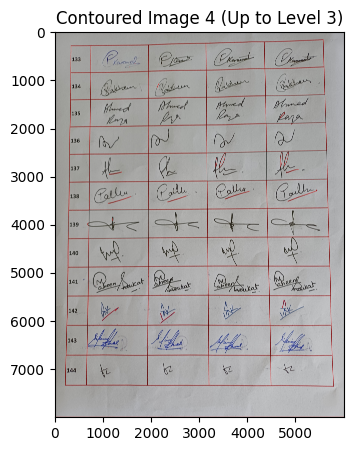

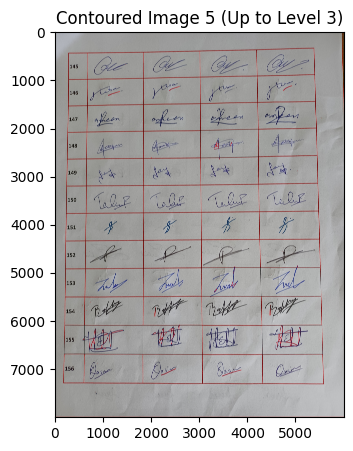

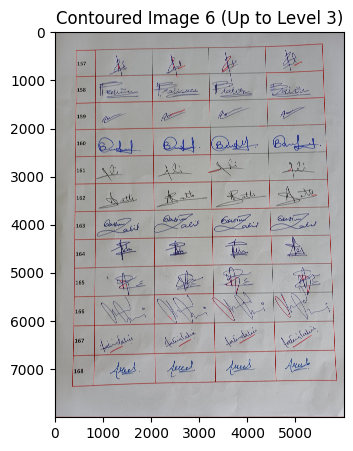

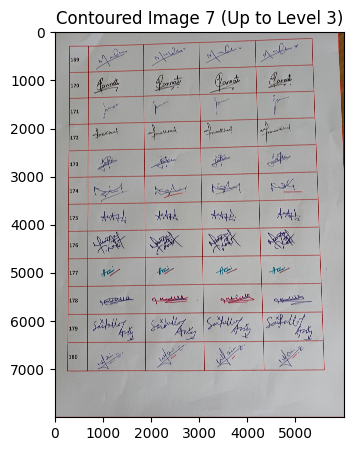

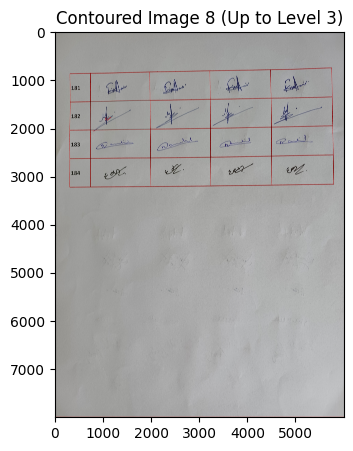

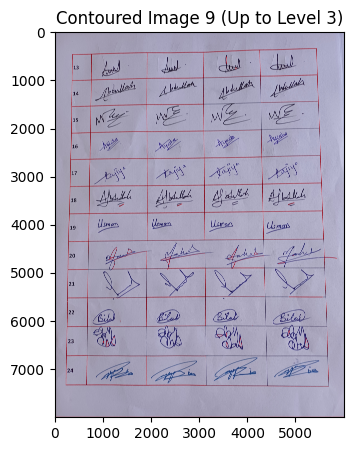

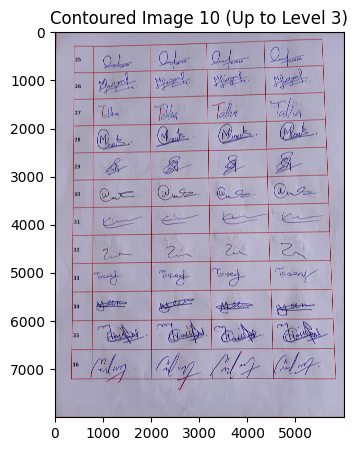

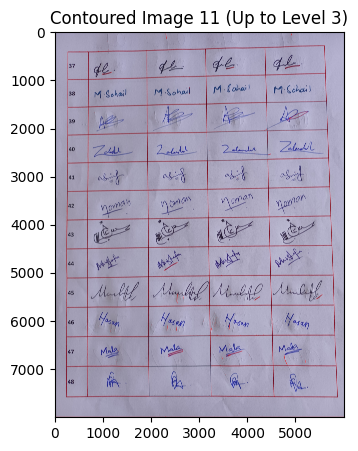

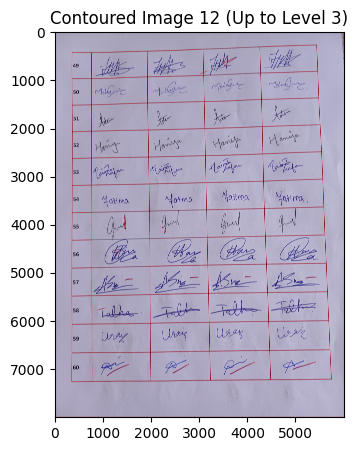

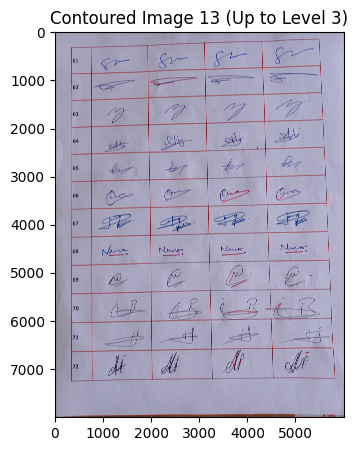

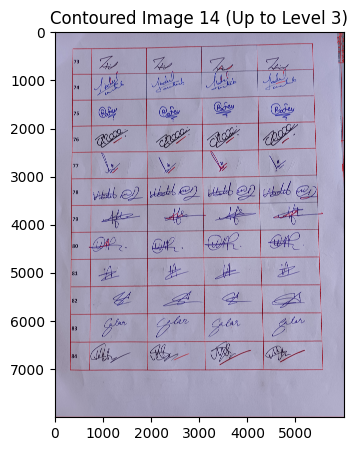

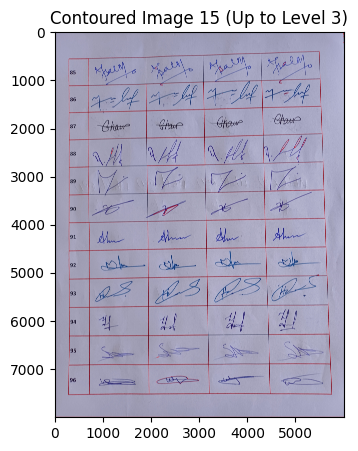

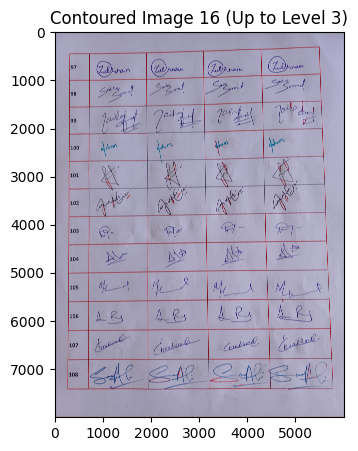

In [43]:
Level_Limit = 2  # Limit for how many levels to print
curvature_threshold = 0.02  # Threshold for determining if a contour is too curved
Curve_comparison = 4 # Adjust threshold as needed (e.g., >10 points for complex/curved shapes)

for i, image in enumerate(Image):
    # Convert the image to grayscale
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply thresholding (e.g., binary thresholding)
    ret, thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
    
    # Find contours and hierarchy
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # Initialize a variable to track the maximum level of hierarchy
    max_level = 0
    
    # Iterate over the hierarchy to determine the maximum level
    for j in range(len(hierarchy[0])):
        level = 0
        parent = hierarchy[0][j][3]
        
        # Traverse up the hierarchy to find how deep this contour is
        while parent != -1:
            level += 1
            parent = hierarchy[0][parent][3]
        
        # Track the maximum level encountered
        max_level = max(max_level, level)
    
    # Define the maximum depth to print contours (1 less than max level)
    depth_to_print = max_level - Level_Limit
    
    # Draw contours up to the level 'depth_to_print'
    img_contour = image.copy()
    
    for j in range(len(contours)):
        level = 0
        parent = hierarchy[0][j][3]
        
        # Traverse up the hierarchy to calculate the depth of the contour
        while parent != -1:
            level += 1
            parent = hierarchy[0][parent][3]
        
        # If contour is deeper than allowed depth, ignore it
        if level > depth_to_print:
            continue
        
        # Approximate the contour to see if it's curved
        epsilon = curvature_threshold * cv2.arcLength(contours[j], True)
        approx = cv2.approxPolyDP(contours[j], epsilon, True)
        
        # Ignore highly curved contours (if the approximation has too many points)
        if len(approx) > Curve_comparison:  
            continue
        
        # Draw the contour if it passes the depth and curvature checks
        cv2.drawContours(img_contour, [contours[j]], -1, (0, 0, 255), 2)

    # Visualize the contoured image with hierarchy up to 'depth_to_print'
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title(f"Contoured Image {i+1} (Up to Level {depth_to_print})")
    plt.imshow(cv2.cvtColor(img_contour, cv2.COLOR_BGR2RGB))

# Show the plots
plt.show()
